In [1]:
# Libraries we need 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import math, copy
np.set_printoptions(precision=2)

## Training Data

In [2]:
df = pd.read_csv('SimpleTrainingData.csv')

In [3]:
df

,Feature,target
0,6.1101,17.59200
1,5.5277,9.13020
2,8.5186,13.66200
3,7.0032,11.85400
4,5.8598,6.82330
...,...,...
92,5.8707,7.20290
93,5.3054,1.98690
94,8.2934,0.14454
95,13.3940,9.05510


In [4]:
x_train = df['Feature'].to_numpy()
y_train = df['target'].to_numpy()

In [5]:
print("The Features & Targets\n")
print(f"Features = {x_train}\n")
print(f"Targets = {y_train}")

The Features & Targets

Features = [ 6.11  5.53  8.52  7.    5.86  8.38  7.48  8.58  6.49  5.05  5.71 14.16
  5.73  8.41  5.64  5.38  6.37  5.13  6.43  7.07  6.19 20.27  5.49  6.33
  5.56 18.95 12.83 10.96 13.18 22.2   5.25  6.59  9.25  5.89  8.21  7.93
  8.1   5.61 12.84  6.35  5.41  6.88 11.71  5.77  7.82  7.09  5.07  5.8
 11.7   5.54  7.54  5.31  7.42  7.6   6.33  6.36  6.27  5.64  9.31  9.45
  8.83  5.18 21.28 14.91 18.96  7.22  8.3  10.24  5.5  20.34 10.14  7.33
  6.01  7.23  5.03  6.55  7.54  5.04 10.27  5.11  5.73  5.19  6.36  9.77
  6.52  8.52  9.18  6.    5.52  5.06  5.71  7.64  5.87  5.31  8.29 13.39
  5.44]

Targets = [17.59  9.13 13.66 11.85  6.82 11.89  4.35 12.    6.6   3.82  3.25 15.51
  3.16  7.23  0.72  3.51  5.3   0.56  3.65  5.39  3.14 21.77  4.26  5.19
  3.08 22.64 13.5   7.05 14.69 24.15 -1.22  6.   12.13  1.85  6.54  4.56
  4.12  3.39 10.12  5.5   0.56  3.91  5.39  2.44  6.73  1.05  5.13  1.84
  8.    1.02  6.75  1.84  4.29  5.    1.42 -1.42  2.48  4.6   3.96  5.4

In [6]:
print(f"The number of training data is {len(x_train)}")

The number of training data is 97


In [7]:
# Check number of Features equal Targets
x_train.shape[0] == len(y_train)

True

## Visualize Data

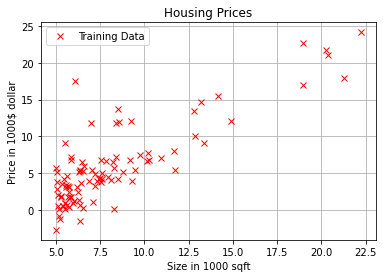

In [8]:
plt.plot(x_train, y_train, 'xr', label='Training Data')
plt.xlabel('Size in 1000 sqft')
plt.ylabel('Price in 1000$ dollar')
plt.title('Housing Prices')

plt.legend()
plt.grid()
plt.show()

## Model
$$ f_{w,b}(x^{(i)}) = wx^{(i)} + b $$

In [9]:
def compute_model(x, w, b):
    
    return w*x + b

## Cost Function (MSE)
  $$J(w,b) = \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})^2 $$ 

In [10]:
def compute_cost(x, y, w, b):
    
    m = x.shape[0]
    
    cost = sum((w*x + b - y)**2)
    cost /= m
    
    return cost

## Gradient Descent

$$\begin{align*} \text{repeat}&\text{ until convergence:} \; \lbrace \newline
\;  w &= w -  \alpha \frac{\partial J(w,b)}{\partial w}  \; \newline 
 b &= b -  \alpha \frac{\partial J(w,b)}{\partial b}  \newline \rbrace
\end{align*}$$
where, parameters $w$, $b$ are updated simultaneously.  
The gradient is defined as:
$$
\begin{align}
\frac{\partial J(w,b)}{\partial w}  &= \frac{2}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})x^{(i)} \\
  \frac{\partial J(w,b)}{\partial b}  &= \frac{2}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)}) \\
\end{align}
$$

Here *simultaniously* means that you calculate the partial derivatives for all the parameters before updating any of the parameters.

In [11]:
def compute_partial_derivative(x, y, w, b):
    
    m = len(x)
    
    dj_dw = (2/m) * sum((w*x + b - y) * x)
    dj_db = (2/m) * sum(w*x + b - y)
    
    return dj_dw, dj_db

In [12]:
def gradient_descent(x, y, w_in, b_in, alpha, num_iters, cost, partial, model):
    
    m = len(x)
    
    w, b = w_in, b_in
    J_history, p_history = [], []
    
    for i in range(num_iters):
        dj_dw, dj_db = partial(x, y, w, b)
        
        w -= alpha * dj_dw
        b -= alpha * dj_db
        
        if i<100000:      
            J_history.append(cost(x, y, w , b))
            p_history.append([w,b])
            
        if i % (num_iters//10) == 0:   # every (num_iters//10)
            print(f"Iteration {i:4}: Cost {J_history[-1]:0.2e} ",
                  f"dj_dw: {dj_dw: 0.3e}, dj_db: {dj_db: 0.3e}  ",
                  f"w: {w: 0.3e}, b:{b: 0.5e}")
    print("")
    
    print(f"(w,b) found by gradient descent: ({w:8.4f},{b:8.4f})")
    print(f"Cost function: {J_history[-1]}")
    
    return w, b, J_history, p_history

In [13]:
w_init = 0
b_init = 0

iterations = 10000
tmp_alpha = 0.003

# run gradient descent
w_final, b_final, J_hist, p_hist = gradient_descent(x_train ,y_train, w_init, b_init, tmp_alpha, 
                                                    iterations, compute_cost, compute_partial_derivative, compute_model)

Iteration    0: Cost 2.53e+01  dj_dw: -1.307e+02, dj_db: -1.168e+01   w:  3.920e-01, b: 3.50348e-02
Iteration 1000: Cost 9.28e+00  dj_dw: -4.879e-02, dj_db:  4.857e-01   w:  1.058e+00, b:-2.55006e+00
Iteration 2000: Cost 8.99e+00  dj_dw: -1.653e-02, dj_db:  1.646e-01   w:  1.147e+00, b:-3.43976e+00
Iteration 3000: Cost 8.96e+00  dj_dw: -5.603e-03, dj_db:  5.577e-02   w:  1.178e+00, b:-3.74125e+00
Iteration 4000: Cost 8.95e+00  dj_dw: -1.899e-03, dj_db:  1.890e-02   w:  1.188e+00, b:-3.84341e+00
Iteration 5000: Cost 8.95e+00  dj_dw: -6.434e-04, dj_db:  6.404e-03   w:  1.191e+00, b:-3.87804e+00
Iteration 6000: Cost 8.95e+00  dj_dw: -2.180e-04, dj_db:  2.170e-03   w:  1.192e+00, b:-3.88977e+00
Iteration 7000: Cost 8.95e+00  dj_dw: -7.388e-05, dj_db:  7.354e-04   w:  1.193e+00, b:-3.89374e+00
Iteration 8000: Cost 8.95e+00  dj_dw: -2.504e-05, dj_db:  2.492e-04   w:  1.193e+00, b:-3.89509e+00
Iteration 9000: Cost 8.95e+00  dj_dw: -8.484e-06, dj_db:  8.445e-05   w:  1.193e+00, b:-3.89555e+00


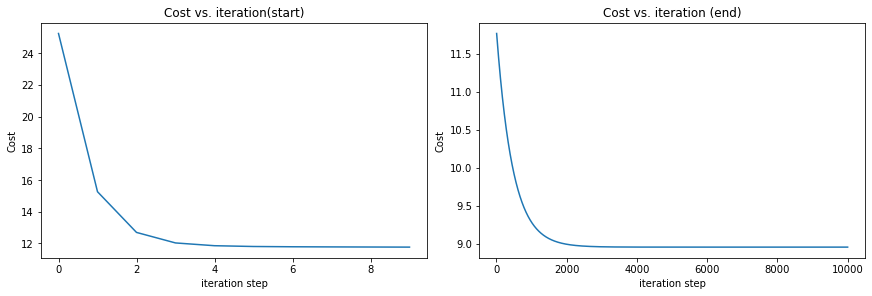

In [14]:
# plot cost versus iteration  
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12,4))

ax1.plot(J_hist[:10])
ax2.plot(10 + np.arange(len(J_hist[10:])), J_hist[10:])

ax1.set_title("Cost vs. iteration(start)");  ax2.set_title("Cost vs. iteration (end)")
ax1.set_ylabel('Cost')            ;  ax2.set_ylabel('Cost') 
ax1.set_xlabel('iteration step')  ;  ax2.set_xlabel('iteration step') 

plt.show()

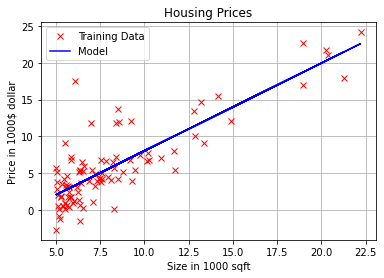

In [15]:
plt.plot(x_train, y_train, 'xr', label='Training Data')
plt.plot(x_train, compute_model(x_train, w_final, b_final), 'b', label='Model')

plt.xlabel('Size in 1000 sqft')
plt.ylabel('Price in 1000$ dollar')
plt.title('Housing Prices')

plt.legend()
plt.grid()
plt.show()

### Some Predictions

In [16]:
m = len(x_train)
for i in range(10):
    print(f"prediction: {compute_model(x_train, w_final, b_final)[i]:0.2f}, target value: {y_train[i]}")

prediction: 3.39, target value: 17.592
prediction: 2.70, target value: 9.1302
prediction: 6.27, target value: 13.662
prediction: 4.46, target value: 11.854
prediction: 3.10, target value: 6.8233
prediction: 6.11, target value: 11.886
prediction: 5.02, target value: 4.3483
prediction: 6.34, target value: 12.0
prediction: 3.84, target value: 6.5987
prediction: 2.13, target value: 3.8166


## Using Scikit-Learn library

In [17]:
# Import libraries
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [18]:
x_train = np.array(x_train).reshape(-1, 1)
y_train = np.array(y_train).reshape(-1, 1)

regressor = LinearRegression()
regressor.fit(x_train, y_train);

In [19]:
w, b= regressor.coef_[0][0], regressor.intercept_[0]
print(f"(w,b) found by Scikit-Learn: ({w:8.4f},{b:8.4f})")

(w,b) found by Scikit-Learn: (  1.1930, -3.8958)


In [20]:
mse = mean_squared_error(y_train, regressor.predict(x_train))
print(f'Mean squared error: {mse:.2f}')

Mean squared error: 8.95


### Some Predictions

In [21]:
m = len(x_train)
for i in range(10):
    print(f"prediction: {regressor.predict([x_train[i]])[0]}, target value: {y_train[i]}")

prediction: [3.39], target value: [17.59]
prediction: [2.7], target value: [9.13]
prediction: [6.27], target value: [13.66]
prediction: [4.46], target value: [11.85]
prediction: [3.1], target value: [6.82]
prediction: [6.11], target value: [11.89]
prediction: [5.02], target value: [4.35]
prediction: [6.34], target value: [12.]
prediction: [3.84], target value: [6.6]
prediction: [2.13], target value: [3.82]
